In [2]:
import numpy
import matplotlib
from matplotlib import pyplot

In [7]:
def f(x):
    return 3*x**2+2*x+5

In [8]:
xs=numpy.arange(-5,5,0.5)
ys=f(xs)

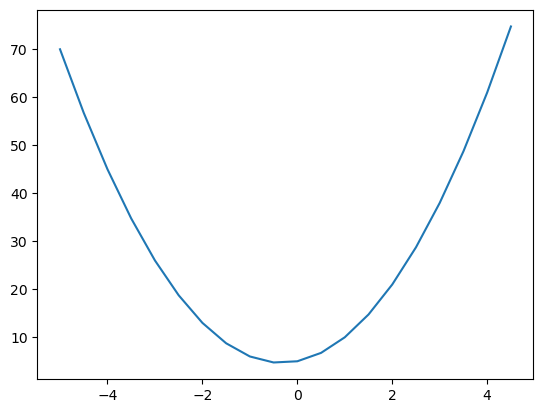

In [11]:
pyplot.plot(xs,ys)

# Derivative of the function


$L =  \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$


In [14]:
h=0.0001
x=3
(f(x+h)-f(x))/h

20.000300000049265

In [54]:
class Value:
    '''
    Scalar value class
    '''
    def __init__(self,data,_children=(),_op='',label=''):
        '''
        data: is the floating point value stored in the object
        _children: empty tuple, set of children
        _op: series of operation performed
        '''
        self.data = data
        self._prev=set(_children)
        self._op=_op
        self.label = label
    def __repr__(self):
        return f'Value (data {self.data})'
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        return out

In [69]:
a=Value(2.0,label='a')
b=Value(3.0,label='b')
c=Value(10.0,label='c')
e=a*b;e.label='e'
d=e+c
d.label='d'
f=Value(5.0,label='f')
L=f*d
print(a+b)
print(a*b)
print(d)

Value (data 5.0)
Value (data 6.0)
Value (data 16.0)


In [70]:
print(d._prev)
print(d._op)

{Value (data 6.0), Value (data 10.0)}
+


# Graph Visualization

In [71]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


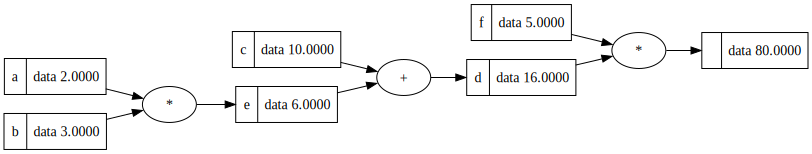

In [73]:
draw_dot(L)